In [30]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sfm
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

In [31]:
tratamento = pd.read_csv('../../Arquivos/anova.csv', sep = ";")
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


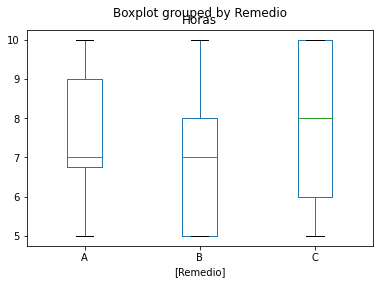

In [32]:
tratamento.boxplot(by = 'Remedio', grid=False)

In [33]:
#criação do modelo de regressão linear e execução do teste
modelo1 = sfm.ols('Horas ~ Remedio', data = tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
# Observe o valor de p, Pr>f hipótese nula de que não há diferença
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [34]:
modelo2 = sfm.ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo1)
# Observe o valor de p, Pr>f hipótese nula de que não há diferença
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


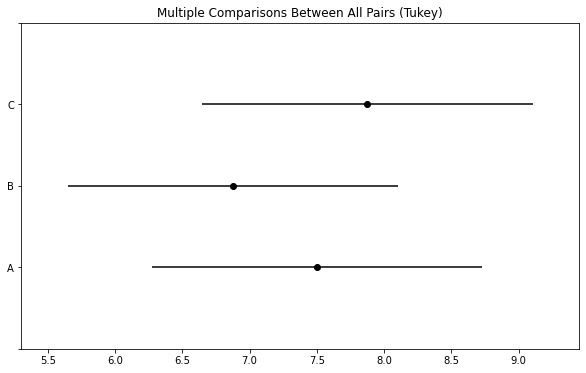

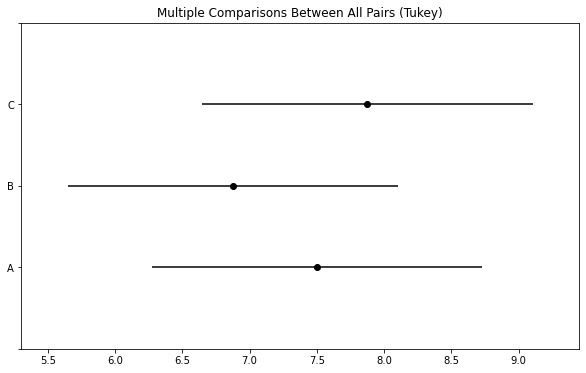

In [35]:
# execução do teste de Tukey
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultados_teste = mc.tukeyhsd()
print(resultados_teste)
resultados_teste.plot_simultaneous()
